<a href="https://colab.research.google.com/github/ascarrambad/ml-21-22/blob/main/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2022/2023

- Prof. Cesare Alippi
- Giorgia Adorni ([`giorgia.adorni@usi.ch`](mailto:giorgia.adorni@usi.ch))<br>
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>
- Alessandro Manenti ([`alessandro.manenti@usi.ch`](mailto:alessandro.manenti@usi.ch))

---

# Lab 02: Classification

---

# A) **Goal**: classify linearly separable synthetic data

We have a $d$-dimensional input vector $X \in \mathbb{R}^d$ and a set of $k$ possible classes, $C_1, \dots, C_k$.
Our goal in classification is to assign $X$ to the correct class. 

In particular, our goal is to determine a __discriminant__ function to parition the input space. In this session we will focus on binary classification.

![alt text](https://jakelearnsdatascience.files.wordpress.com/2017/02/lda_binary.png)

# A.1) Collect and prepare data

In [231]:
# first we define some helper functions to generate data and plot results
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "bwr" # Define the colors to use in the plot
plt.rcParams["scatter.edgecolors"] = 'k'


# function to generate classification problems
def get_data(n, ctype):
  if ctype == 'simple':
    x, y = make_classification(n_features=2, 
                               n_redundant=0, 
                               n_informative=2, 
                               n_clusters_per_class=1)
    x += np.random.uniform(size=x.shape) # add some noise
  elif ctype == 'circles':
    x, y = make_circles(n, noise=0.1, factor=0.5)
  else:
    raise ValueError
  return x, y

# function to plot decision boundaries
def plot_decision_surface(model, x, y, transform=lambda x:x, with_probability=False):    
  #init figure
  fig = plt.figure()

  # Create mesh
  h = .01  # step size in the mesh
  x1_min, x1_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  x2_min, x2_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                        np.arange(x2_min, x2_max, h))

  if with_probability == False:
    y_pred = model.predict(transform(np.c_[xx.ravel(), yy.ravel()]))

    y_pred = y_pred.reshape(xx.shape)

    # plot background color
    plt.contourf(xx, yy, y_pred > 0.5, alpha=.5)
  else:
    y_proba = model.predict_proba(transform(np.c_[xx.ravel(), yy.ravel()]))

    y_proba = 1- y_proba[:,0].reshape(xx.shape[0], xx.shape[1])

    # plot background color
    plt.imshow(y_proba, alpha=.5, extent=[x1_min, x1_max, x2_min, x2_max], origin='lower')
    plt.colorbar(label='Probability of being RED')
    

  # plot train data
  plt.scatter(x[:, 0], x[:, 1], c=y)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')


Text(0, 0.5, '$x_2$')

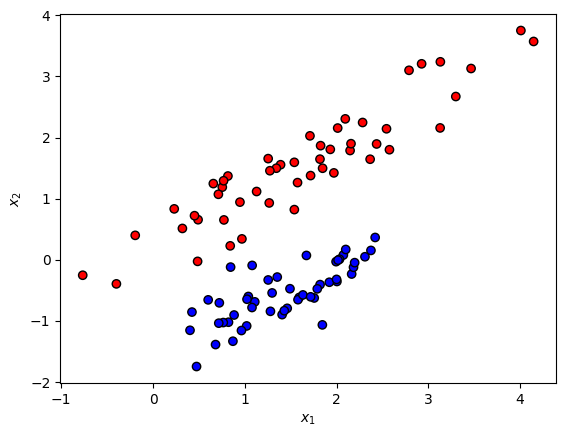

In [232]:
np.random.seed(42)

# Create a classification problem
x, y = get_data(100, ctype='simple')

# Let's look at the data
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# A.2) Linear Discriminant Analysis

Bayes' theorem states:
$$
P(A | B) = \frac{P(B|A) P(A)}{P(B)}
$$

If A is the event "$Y_i$ = k"

and B is the event "$X_i$ = x"

we have seen in class that a **Bayes classifier** can be built:
$$
P(Y_i = k | X_i = x) = \frac{P(X_i = x|Y_i = k) P(Y_i = k)}{P(X_i = x)}
$$

<br/><br/><br/><br/><br/>
**Linear Discriminant Analysis (LDA)** makes 2 main assumptions on the data generating process:

1) The likelihoods P($X_i$ = x|$Y_i$ = k) are Gaussian probability density functions

2) All the Gaussians have the same covariance matrix $\Sigma$

This way Bayes' theorem can be written as:
$$
P(Y_i = k | X_i = x) = \frac{\pi_k f_k(x)}{\Sigma_{l=1}^K \pi_l f_l(x)}
$$

with
$$
f_k(x) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} e^{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)} 
$$

The predicted class for $Y_i$ will be
$$
argmax_k(P(Y_i = k | X_i = x)) = argmax_k(log(P(Y_i = k | X_i = x)))
$$

If we compute $log(P(Y_i = k | X_i = x))$ (removing k-independent terms) we get:

$$
log(P(Y_i = k | X_i = x)) \equiv \boxed{\delta_k(x)} = \boxed{x^T \Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)}
$$

**That is LINEAR** in x

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

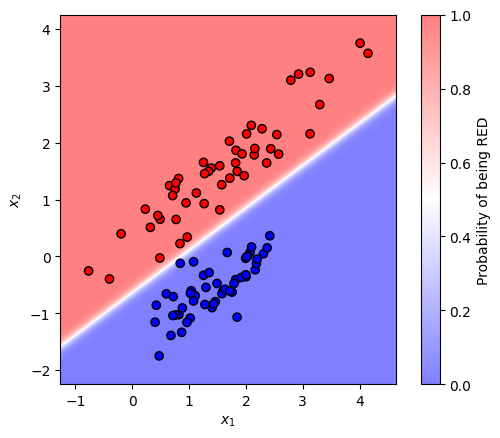

In [234]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(x, y)

plot_decision_surface(classifier, x, y, with_probability=True)

# A.3) Logistic Regression
The Logistic Regression classifier makes an assumption on the posterior:

$$\boxed{Pr(y_i=1\vert x_i, \boldsymbol \theta)} = \sigma(x_i^\top\boldsymbol \theta) = \boxed{\frac{1}{1+e^{-x_i^\top\boldsymbol \theta}}}
$$

Where $\sigma({}\cdot{})$ is the _sigmoid_ function:

<img style="text-align: center" src="https://miro.medium.com/v2/resize:fit:970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width="500">

For 1 sample the probability can be written as:
$$
Pr(y_i\vert x_i, \boldsymbol \theta) = \sigma_i^{y_i}(1 - \sigma_i)^{1-y_i}
$$

For n samples the joint probability is:
$$
Pr(y_1, y_2, ..., y_n\vert x_1, x_2, ..., x_n,  \boldsymbol \theta) = \Pi_i^n\sigma_i^{y_i}(1 - \sigma_i)^{1-y_i}
$$

Maximizing the joint probability is equivalent to maximizing its logarithm:
$$
l(\boldsymbol \theta) = \Sigma_i(y_ilog(\sigma_i) + (1 - y_i)log(1 - \sigma_i))
$$

and
$$
\hat{\theta} = argmax_{\theta}(l(\theta))
$$


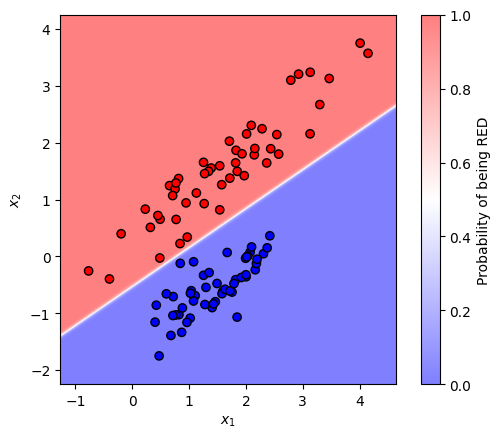

In [235]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty=None) # create an instance of the model
classifier.fit(x, y)              # fit the data

plot_decision_surface(classifier, x, y, with_probability=True)

Logistic Regression is often referred to as a **generalized linear method**. In fact, even if the model is nonlinear, the predicted class depends only on the linear combination $x_i^\top \boldsymbol \theta$ of the input variables. In other words, the decision surfaces are **linear**.

In fact, the decision boundary of the binary logistic regression model that we built can be written as:

$$x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1$$

_Exercise: show why this is true._

Classifier Intercept: [26.04350492]
Classifer Angular coeffs.: [[-33.40470114  48.61461615]]


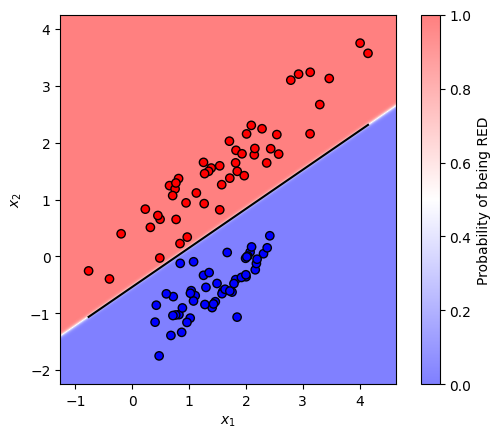

In [255]:
print(f'Classifier Intercept: {classifier.intercept_}')
print(f'Classifer Angular coeffs.: {classifier.coef_}')

theta = [classifier.intercept_, classifier.coef_[0,0], classifier.coef_[0,1]]


b = -theta[0]/theta[2]
m = -theta[1]/theta[2]

x1 = np.array([x[:,0].min(), x[:,0].max()])
x2 = b + m * x1

plot_decision_surface(classifier, x, y, with_probability=True)
plt.plot(x1, x2, c='black')


---

# B) **Goal**: classify non-linearly separable synthetic data

# B.1) Prepare data

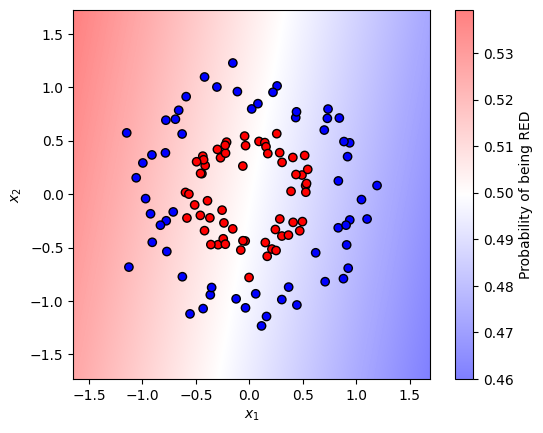

In [259]:
np.random.seed(0)

x,y = get_data(120, 'circles')

classifier = LogisticRegression(penalty=None)
classifier.fit(x, y)

plot_decision_surface(classifier, x, y, with_probability=True)

Remember: the linearity is in the input variables! We can use some nonlinear features to project the data in a space where they are separable with a straight line.

Let's try with polar coordinates.
$$
\left\{\begin{array}{rl}
x&=r \cos \phi \\
y&=r \sin \phi
\end{array}
\right. \implies
\left\{
  \begin{array}{rl}
r&=\sqrt{x^2 + y^2}\\
\phi&= {atan2}\left(y,x\right) 
\end{array}
\right.
$$

<img src="https://www.linearmotiontips.com/wp-content/uploads/2019/10/Polar-Cartesian-Coordinates-Feature.jpg" width="500"/>



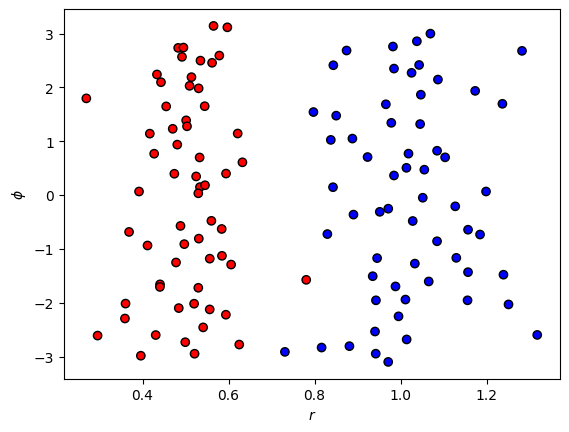

In [257]:
def to_polar(x):
  r = np.sqrt(np.square(x).sum(axis=1))
  phi = np.arctan2(x[:,1], x[:,0])
  return np.c_[r, phi]

x_polar = to_polar(x)

plt.scatter(x_polar[:, 0], x_polar[:, 1], c=y)
plt.xlabel(r'$r$')
plt.ylabel(r'$\phi$')
plt.show()

Nice! Let's fit the model using the polar features.

# B.2) Logistic Regression

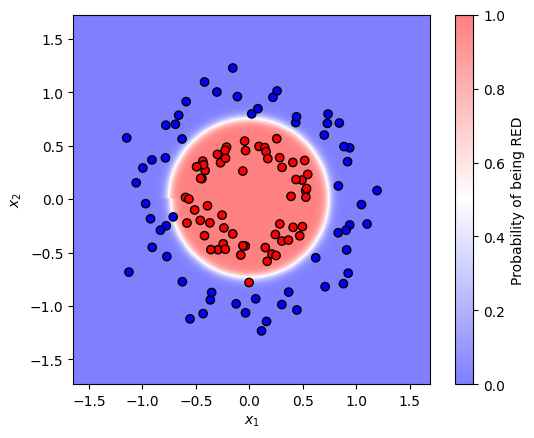

In [260]:
classifier = LogisticRegression(penalty=None)
classifier.fit(x_polar, y)

plot_decision_surface(classifier, x, y, transform=to_polar, with_probability=True)

It is not always easy to find suitable features/projections by hand.

In a future Lab session we will see how to use neural networks to solve classification problems.

## K-Nearest Neighbors

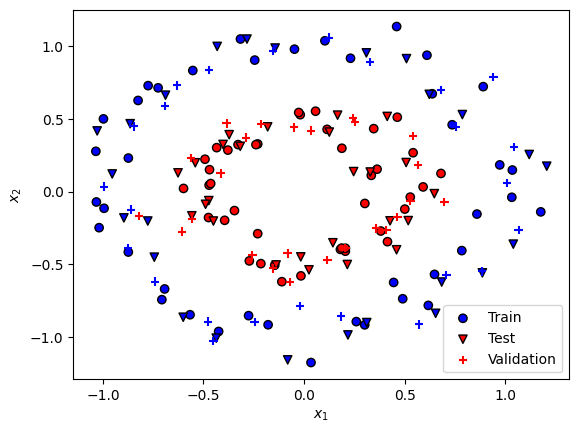

In [311]:
# Data
np.random.seed(42)

x_train, y_train = get_data(80, 'circles')
x_validation, y_validation = get_data(50, 'circles')
x_test, y_test = get_data(50, 'circles')

# Let's look at the data
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train, label="Train")
plt.scatter(x_test[:, 0], x_test[:, 1], marker="v", c=y_test, label="Test")
plt.scatter(x_validation[:, 0], x_validation[:, 1], marker="+", c=y_validation, label="Validation")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()


### Goal: find the optimal number $\hat{k}$ of k-nn to use.

Hint 1: look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Hint 2: Remember what train, validation and test sets are used for 



| Set        | Usage                                                                                       |
| ---------- | ------------------------------------------------------------------------------------------- |
| Train      | used to fit your model                                                                      |
| Validation | used to choose the best hyperparameters (those parameters you have to set at the beginning) |
| Test       | used only once to have an estimate of your model's performance                              |

In [307]:
# try it on your own!